In [2]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd 
import edhec_risk_kit as erk

%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# GBM Interactive Plots

In [23]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock preice evolution under a Geometric Brownian
    Motion Model 
    """
    s_0=100
    prices = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color="indianred", alpha= 0.5, linewidth=2,
                    figsize=(12,5))
    ax.axhline(y = s_0, ls=":", color="darkred", alpha=1)
    ax.set_ylim(top=400)
    #Draw a dotat the origin
    ax.plot(0, s_0, marker='o', color="darkred", alpha=0.2)

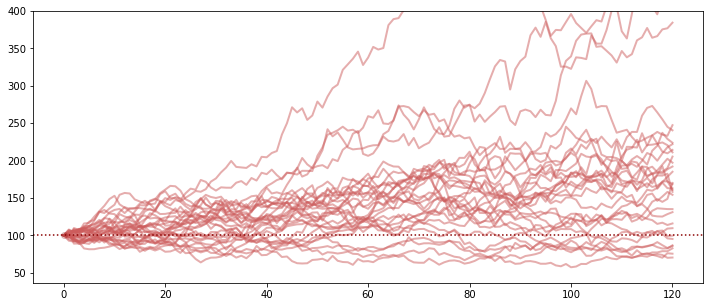

In [24]:
show_gbm(30, 0.07, 0.15)

In [25]:
gbm_controls = widgets.interactive(show_gbm, 
                                   n_scenarios = (1, 20, 1),
                                   mu = (-0.2, 0.2, 0.01),
                                   sigma=(0,.3,.01)
                                  )

In [26]:
display(gbm_controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

## Interactive CPPI Simulation - Monte Carlo

In [41]:
def show_cppi(n_scenarios, mu=0.07, floor = 0, sigma=0.15, m=3, riskfree_rate=0.3, y_max=100):
    start = 100
    gbm_returns = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False)
    #Runs the CPPI strategy
    btr = erk.run_cppi(risky_r=gbm_returns, riskfree_rate=riskfree_rate, start=start,
                      floor=floor)
    wealth = btr["Wealth"]
    y_max=wealth.values.max()*y_max/100
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12,6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start*floor, ls="--", color="red")
    ax.set_ylim(top=y_max)

cppi_controls=widgets.interactive(show_cppi, 
                                 n_scenarios=widgets.IntSlider(
                                 min=1, max=1000, step=5, value=50),
                                  mu=(0, +.2, .01),
                                  sigma=(0, .3, .05),
                                  floor=(0, 2, .1),
                                  m=(1, 5, .5),
                                  riskfree_rate=(0,.05,.01),
                                  y_max=widgets.IntSlider(
                                  min=0, max=100, step=1, value=100,
                                      description="Zoom Y Axis")
                                 )
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [39]:
gbm = erk.gbm(prices=False)
gbm

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.041759,0.030052,-0.020360,0.109440,0.023429,0.006152,-0.002580,-0.034023,0.072094,0.045724,...,-0.027485,0.017742,0.051375,-0.057698,0.014849,-0.007711,0.001013,-0.033646,0.003153,-0.008094
2,-0.012870,-0.002169,0.012830,-0.002958,-0.043665,0.011061,-0.006824,0.002390,0.025689,0.018348,...,-0.010673,0.013570,0.007463,0.037249,0.048024,0.014324,0.098493,-0.046240,-0.001051,-0.082066
3,0.020239,-0.024544,0.038522,0.051299,0.012858,0.015829,0.024486,-0.009893,-0.058868,0.083436,...,0.012524,-0.022547,-0.001810,0.030974,-0.024626,-0.081548,0.029271,0.055836,0.006093,0.032464
4,-0.001173,-0.000198,0.059338,-0.029613,-0.067807,0.019250,-0.021420,-0.036745,0.074605,-0.003282,...,0.000258,0.025397,0.006088,0.041120,-0.041405,0.076906,-0.031006,0.124660,-0.006943,-0.004662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.014598,0.048655,-0.033781,-0.027608,0.057408,0.046893,0.015747,0.061930,0.063043,0.032950,...,-0.036584,0.078348,-0.019544,0.056332,0.053060,0.052829,-0.049411,0.073431,0.078035,-0.044558
117,0.018675,0.048541,-0.062010,-0.004426,0.033232,0.029968,0.000104,-0.002647,-0.071578,0.006877,...,0.021600,0.036884,-0.006300,0.042965,0.000037,0.039023,0.080577,-0.058191,0.030198,-0.006885
118,-0.013604,0.094938,-0.007209,-0.022077,0.018776,-0.056598,0.098584,-0.039500,-0.007832,-0.011804,...,-0.009917,-0.020474,0.024401,-0.034594,-0.028043,-0.017995,0.057539,0.014566,-0.003885,-0.001986
119,0.027291,0.006346,-0.018719,0.030793,0.024235,0.002613,-0.022765,0.013054,0.008606,0.008053,...,-0.061020,0.076264,0.010163,-0.041063,-0.068534,0.044246,0.003667,-0.031844,0.029403,-0.054966


In [60]:
import matplotlib.pyplot as plt
import numpy as np

In [102]:
def show_cppi(n_scenarios, mu=0.07, floor = 0, sigma=0.15, m=3, riskfree_rate=0.3, y_max=100):
    start = 100
    gbm_returns = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False)
    #Runs the CPPI strategy
    btr = erk.run_cppi(risky_r=gbm_returns, riskfree_rate=riskfree_rate, start=start,
                      floor=floor)
    wealth = btr["Wealth"]
    #Calculate terminal wealth stats
    y_max=wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures/n_scenarios
    
    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures>0 else 0.0
    
    #Plot
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True,
                                            gridspec_kw={"width_ratios":[3,2]}, figsize=(24,12))
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    hist_ax.annotate(f"Mean: ${int(tw_mean)}$", xy=(.7,.9), xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f"Median: ${int(tw_median)}$", xy=(.7,.85), xycoords='axes fraction', fontsize=24)
    
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2}$", 
                        xy=(.7,.70), xycoords='axes fraction', fontsize=24)
    
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred',
                             orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    
cppi_controls=widgets.interactive(show_cppi, 
                                 n_scenarios=widgets.IntSlider(
                                 min=1, max=1000, step=5, value=50),
                                  mu=(-.1, +.2, .01),
                                  sigma=(0, .5, .05),
                                  floor=(0, 2, .1),
                                  m=(1, 5, .5),
                                  riskfree_rate=(-.01,.05,.01),
                                  y_max=widgets.IntSlider(
                                  min=0, max=100, step=1, value=100,
                                      description="Zoom Y Axis")
                                 )
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

### Exercise Show EF2

In [98]:
def mod_plot_ef2(mu1, mu2, std1, std2, corr, n_points=20):
    er = pd.Series([mu1, mu2])
    cov = pd.DataFrame([[std1**2, corr*std1*std2],
                    [corr*std1*std2, std2**2]])
    return erk.plot_ef2(n_points, er, cov)

plot_ef2_control = widgets.interactive(mod_plot_ef2,
                                      mu1 = (0.01, 1, 0.01),
                                      mu2 = (0.01, 1, 0.01),
                                      std1=(0.001, 1, 0.01),
                                      std2=(0.01,1,0.01), 
                                      corr=(-1, 1, 0.01), 
                                      n_point=(20, 100, 1))    
display(plot_ef2_control)    

interactive(children=(FloatSlider(value=0.5, description='mu1', max=1.0, min=0.01, step=0.01), FloatSlider(val…

0    0.01
1    0.01
dtype: float64         0       1
0  0.0001  0.0001
1  0.0001  0.0001


<AxesSubplot:xlabel='Volatility'>

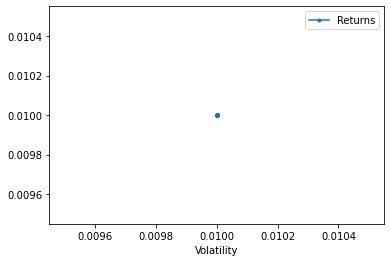

In [94]:
mod_plot_ef2(0.01, 0.01, 0.01,0.01, 1)

In [95]:
mu1 = 0.02
mu2 =0.03
std1=0.01
std2=0.1
corr = 1

er = pd.Series([mu1, mu2])
cov = pd.DataFrame([[std1**2, corr*std1*std2],
                    [corr*std1*std2, std2**2]])

In [96]:
er

0    0.02
1    0.03
dtype: float64

In [92]:
cov

,0,1
0,0.0001,0.001
1,0.0010,0.010
